# Poke-Project

Pokemon EDA and visualisations.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Users\\shani\\PycharmProjects\\poke-project\\Pokemon.csv")
df.head()

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
shape = df.shape
print(f"Number of Rows: {shape[0]}\nNumber of columns: {shape[1]}")

Number of Rows: 800
Number of columns: 13


In [12]:
df.describe()

,poke_id,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From the df.describe we can see that there seems to be no missing numerical data in the table. Between all of the attributes of the pokemon (attack defense etc) we can see that they have similar distributions. Though for comparisons to be made between them we may need to make some normalisations. THe highest mean is attack, but this also has the second highest std meaning that is one of the more varied attributes, closely following special attack.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   poke_id      800 non-null    int64 
 1   Name         800 non-null    object
 2   poke_type_1  800 non-null    object
 3   poke_type_2  414 non-null    object
 4   Total        800 non-null    int64 
 5   HP           800 non-null    int64 
 6   Attack       800 non-null    int64 
 7   Defense      800 non-null    int64 
 8   Sp_Atk       800 non-null    int64 
 9   Sp_Def       800 non-null    int64 
 10  Speed        800 non-null    int64 
 11  Generation   800 non-null    int64 
 12  Legendary    800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


All datatypes are as expected, no updates required.

Ideas for things to explore:
- Most common primary and secondary types of pokemon
- Which pokemon has the best attack defence etc for each stat
- Highest stat per type
- Is there any correlation between pokemon type and stats?
- Is there any relationship between legendary status and stats?

If we use the pokemon primary type as a target, can we predict this from all other information available? What kind of model would be best suited to this kind of question?

Would it also be possible with the given data to predict the winner of contests between two pokemon?

In [16]:
# What are the unique primary pokemon types?
df["poke_type_1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Text(0.5, 0, 'Primary Poke Types')

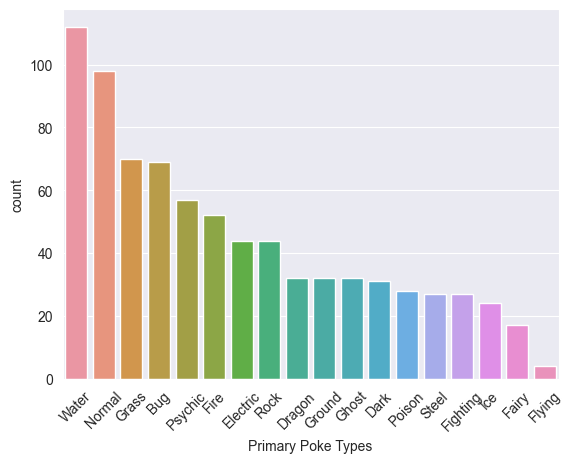

In [51]:
#Count how many times each primary type occurs
type_count = df.poke_type_1.value_counts()
type(type_count)
# Using the value counts produces a pandas Series. We need to convert this into a dataframe to be able to visualise.

cols = ["primary_type", "count"]

types_df = pd.DataFrame(type_count, columns=cols)
types_df.reset_index()
types_df.drop(["primary_type"], axis=1, inplace=True)
types_df.reset_index(inplace=True)


# Now that we have a dataframe we should be able to plot the data
sns.barplot(types_df, x="poke_type_1", y="count", width=0.8)
plt.xticks(rotation=45)
plt.xlabel('Primary Poke Types')

Now we can see that the water type pokemon are athe most common in the pokedex.

Lets also assess the demographic of secondary poke types.

Text(0.5, 0, 'Secondary Poke Types')

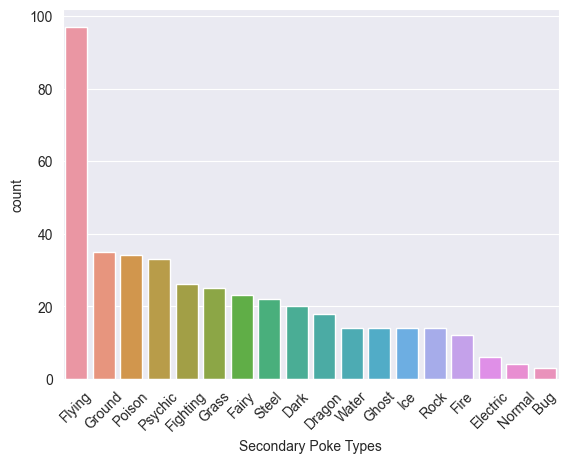

In [50]:
#Count how many times each primary type occurs
sec_type_count = df.poke_type_2.value_counts()
type(type_count)

# Using the value counts produces a pandas Series. We need to convert this into a dataframe to be able to visualise.

cols = ["count"]

sec_types_df = pd.DataFrame(type_count, columns=cols)
sec_types_df.reset_index(inplace=True)

# Now that we have a dataframe we should be able to plot the data
sns.barplot(sec_types_df, x="poke_type_2", y="count", width=0.8)
plt.xticks(rotation=45)
plt.xlabel('Secondary Poke Types')

By far flying type is the most common secondary pokemon type.